In [ ]:
import numpy as np # linear algebra
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from PIL import Image
import random
import seaborn as sns
import pandas as pd

In [ ]:
import warnings
import os
import shutil

In [ ]:
datasetFolderName='NewDataset'
sourceFiles=[]
classLabels=['Covid', 'Normal']

In [ ]:
def transferBetweenFolders(source, dest, splitRate):   
    global sourceFiles
    sourceFiles=os.listdir(source)
    if(len(sourceFiles)!=0):
        transferFileNumbers=int(len(sourceFiles)*splitRate)
        transferIndex=random.sample(range(0, len(sourceFiles)), transferFileNumbers)
        for eachIndex in transferIndex:
            shutil.move(source+str(sourceFiles[eachIndex]), dest+str(sourceFiles[eachIndex]))
    else:
        print("No file moved. Source empty!")
        
def transferAllClassBetweenFolders(source, dest, splitRate):
    for label in classLabels:
        transferBetweenFolders(datasetFolderName+'/'+source+'/'+label+'/', 
                               datasetFolderName+'/'+dest+'/'+label+'/', 
                               splitRate)


In [ ]:
X=[]
Y=[]

def prepareNameWithLabels(folderName):
    sourceFiles=os.listdir(datasetFolderName+'/train/'+folderName)
    for val in sourceFiles:
        X.append(val)
        if(folderName==classLabels[0]):
            Y.append(0)
        elif(folderName==classLabels[1]):
            Y.append(1)
       

In [ ]:
prepareNameWithLabels(classLabels[0])
prepareNameWithLabels(classLabels[1])
   

In [ ]:
X


['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg',
 '03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg',
 '071d06607edf81d70c940e043bce34_jumbo.jpeg',
 '08ed451c576ee00935ee178ec85c57_jumbo-1.jpeg',
 '0a7faa2a.jpg',
 '1-s2.0-S0085253820303616-gr1_lrg-a.png',
 '1-s2.0-S0140673620303706-fx1_lrg.jpg',
 '1-s2.0-S0929664620300449-gr2_lrg-c.jpg',
 '1-s2.0-S0929664620300449-gr2_lrg-d.jpg',
 '1-s2.0-S1521661620303314-gr1_lrg-a.png',
 '1-s2.0-S1684118220300372-gr1_lrg-a.png',
 '1-s2.0-S1684118220300372-gr1_lrg-b.png',
 '1-s2.0-S1684118220300608-main.pdf-001.jpg',
 '1-s2.0-S1684118220300608-main.pdf-002.jpg',
 '1-s2.0-S1684118220300682-main.pdf-002-a1.png',
 '1-s2.0-S1684118220300682-main.pdf-002-a2.png',
 '1-s2.0-S1684118220300682-main.pdf-003-b1.png',
 '1-s2.0-S1684118220300682-main.pdf-003-b2.png',
 '1-s2.0-S1931312820301852-gr1_lrg-c.png',
 '1-s2.0-S2214250920300706-gr2_lrg.jpg',
 '1-s2.0-S2214250920300834-gr1_lrg-b.png',
 '1-s2.0-S2214250920300834-gr1_lrg-c.png',
 '1-s2.0-S2387020620301959-gr3_lrg-a.png

In [ ]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
X=np.asarray(X)
Y=np.asarray(Y)

In [ ]:
X

array(['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg',
       '03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg',
       '071d06607edf81d70c940e043bce34_jumbo.jpeg', ...,
       'NORMAL2-IM-1438-0001.jpeg', 'NORMAL2-IM-1440-0001.jpeg',
       'NORMAL2-IM-1442-0001.jpeg'], dtype='<U91')

In [ ]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
IMAGE_SIZE  = [224,224]
train_path = 'NewDataset/train'
valid_path = 'NewDataset/validation'
test_path='NewDataset/test'

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    
    return accuracy, precision, f1Score ,cm

No file moved. Source empty!
No file moved. Source empty!
Results for fold 1
[   0    3    4 ... 5086 5087 5089] having 3393
[   1    2    8 ... 5082 5084 5088] having 1697
Found 3393 images belonging to 2 classes.
Found 1697 images belonging to 2 classes.
Epoch 1/5
106/106 [==============================] - 374s 4s/step - loss: 0.1382 - accuracy: 0.9479
Epoch 2/5
106/106 [==============================] - 382s 4s/step - loss: 0.0278 - accuracy: 0.9914
Epoch 3/5
106/106 [==============================] - 382s 4s/step - loss: 0.0090 - accuracy: 0.9985
Epoch 4/5
106/106 [==============================] - 381s 4s/step - loss: 0.0069 - accuracy: 0.9991
Epoch 5/5
54/54 [==============================] - 195s 4s/step
***Performance on Validation data***
Accuracy  : 0.9964643488509134
Precision : 0.9964752948250493
f1Score : 0.9964642850047869
[[852   1]
 [  5 839]]


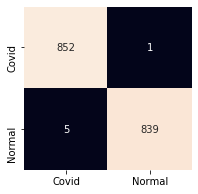

Results for fold 2
[   0    1    2 ... 5086 5087 5088] having 3393
[   3    5   16 ... 5078 5085 5089] having 1697
Found 3393 images belonging to 2 classes.
Found 1697 images belonging to 2 classes.
Epoch 1/5
106/106 [==============================] - 388s 4s/step - loss: 0.1113 - accuracy: 0.9545
Epoch 2/5
106/106 [==============================] - 385s 4s/step - loss: 0.0161 - accuracy: 0.9967
Epoch 3/5
106/106 [==============================] - 385s 4s/step - loss: 0.0088 - accuracy: 0.9991
Epoch 4/5
106/106 [==============================] - 401s 4s/step - loss: 0.0062 - accuracy: 0.9997
Epoch 5/5
54/54 [==============================] - 196s 4s/step
***Performance on Validation data***
Accuracy  : 0.9941072480848556
Precision : 0.9941099197996881
f1Score : 0.9941072030659015
[[849   4]
 [  6 838]]


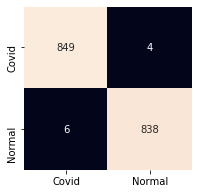

Results for fold 3
[   1    2    3 ... 5085 5088 5089] having 3394
[   0    4    6 ... 5083 5086 5087] having 1696
Found 3394 images belonging to 2 classes.
Found 1696 images belonging to 2 classes.
Epoch 1/5
106/106 [==============================] - 388s 4s/step - loss: 0.1201 - accuracy: 0.9491
Epoch 2/5
106/106 [==============================] - 397s 4s/step - loss: 0.0230 - accuracy: 0.9938
Epoch 3/5
106/106 [==============================] - 407s 4s/step - loss: 0.0106 - accuracy: 0.9982
Epoch 4/5
106/106 [==============================] - 432s 4s/step - loss: 0.0064 - accuracy: 0.9994
Epoch 5/5
53/53 [==============================] - 376s 7s/step
***Performance on Validation data***
Accuracy  : 0.9941037735849056
Precision : 0.9941721752834566
f1Score : 0.994103404570022
[[852   0]
 [ 10 834]]


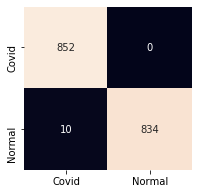

In [ ]:
skf = StratifiedKFold(n_splits=3, shuffle=True)
skf.get_n_splits(X, Y)
foldNum=0
for train_index, val_index in skf.split(X, Y):
    #First cut all images from validation to train (if any exists)
    transferAllClassBetweenFolders('validation', 'train', 1.0)
    foldNum+=1
    print("Results for fold",foldNum)
    print(train_index,"having",len(train_index))
    print(val_index,"having",len(val_index))
   
    
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
   
    # Move validation images of this fold from train folder to the validation folder
    for eachIndex in range(len(X_val)):
        classLabel=''
        if(Y_val[eachIndex]==0):
            classLabel=classLabels[0]
        elif(Y_val[eachIndex]==1):
            classLabel=classLabels[1]
        shutil.move(datasetFolderName+'/train/'+classLabel+'/'+X_val[eachIndex], 
                    datasetFolderName+'/validation/'+classLabel+'/'+X_val[eachIndex])
    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)
    train_datagen = ImageDataGenerator(rescale=1./255)
    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=IMAGE_SIZE,
        class_mode='categorical',
        subset='training')

    validation_generator = validation_datagen.flow_from_directory(
            valid_path,
            target_size=IMAGE_SIZE,
            class_mode=None,  # only data, no labels
            shuffle=False)
    vgg = VGG16(input_shape=IMAGE_SIZE +[3],weights='imagenet',include_top=False)
    for layer in vgg.layers:
        layer.trainable = False
    x=Flatten()(vgg.output)
    prediction = Dense(len(classLabels),activation = 'softmax')(x)
    model = Model(inputs=vgg.input,outputs=prediction)
    model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics= ['accuracy'])
    history=model.fit_generator(train_generator,steps_per_epoch=len(X_train) // 32, 
                        epochs=5,)
    
    predictions = model.predict_generator(validation_generator, verbose=1)
    yPredictions = np.argmax(predictions, axis=1)
    true_classes = validation_generator.classes
    # evaluate validation performance
    print("***Performance on Validation data***")    
    valAcc, valPrec, valFScore,matrix = my_metrics(true_classes, yPredictions)
    df_cm = pd.DataFrame(matrix, index=["Covid","Normal"], columns=["Covid", "Normal"])
    plt.figure(figsize = (3,3))
    sns.heatmap(df_cm, annot=True,cbar=False,fmt='d')
    plt.show()
    
    

==============TEST RESULTS============
Found 382 images belonging to 2 classes.
12/12 [==============================] - 95s 8s/step
Accuracy  : 0.9947643979057592
Precision : 0.9947643979057592
f1Score : 0.9947643979057592
[[ 64   1]
 [  1 316]]


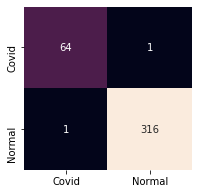

In [ ]:
print("==============TEST RESULTS============")
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=IMAGE_SIZE,
        class_mode=None,
        shuffle=False) 
predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

testAcc,testPrec, testFScore ,matrix= my_metrics(true_classes, yPredictions)
df_cm = pd.DataFrame(matrix, index=["Covid","Normal"], columns=["Covid", "Normal"])
plt.figure(figsize = (3,3))
sns.heatmap(df_cm, annot=True,cbar=False,fmt='d')
plt.show()

In [ ]:
model.save('vgg16copy.h5')